# Setup

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

movies = pd.read_csv('fandango_score_comparison.csv')

# Analysis

## Exploring Difference Between Fandango Review Scores and Others

Text(0.5,1,'Metacritic')

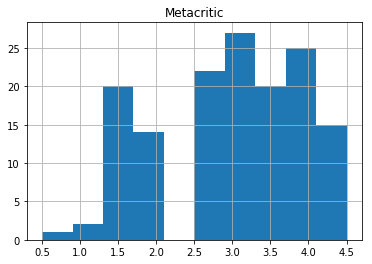

In [3]:
movies['Metacritic_norm_round'].hist()
plt.title('Metacritic')

Text(0.5,1,'Fandango')

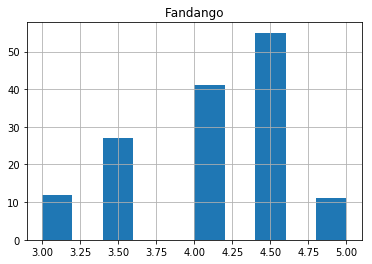

In [4]:
movies['Fandango_Stars'].hist()
plt.title('Fandango')

Metacritic scores have a larger spread varying from 0.5 to 4.5 with about 60 reviews of less than 3 stars. Fandango's scores all lie above 3 with most reviews having a score of 4.5

## Calculating Mean, Median and Standard Deviation

In [5]:
def prettyPrint(msg, val):
    print('{0}: {1}'.format(msg, val))
    
    
mc_mean = movies['Metacritic_norm_round'].mean()
mc_median = movies['Metacritic_norm_round'].median()
mc_std = np.std(movies['Metacritic_norm_round'])
prettyPrint('Mean', mc_mean)
prettyPrint('Median', mc_median)
prettyPrint('Standard Deviation', mc_std)

Mean: 2.9726027397260273
Median: 3.0
Standard Deviation: 0.9875610297038636


In [6]:
fg_mean = movies['Fandango_Stars'].mean()
fg_median = movies['Fandango_Stars'].median()
fg_std = np.std(movies['Fandango_Stars'])
prettyPrint('Mean', fg_mean)
prettyPrint('Median', fg_median)
prettyPrint('Standard Deviation', fg_std)

Mean: 4.089041095890411
Median: 4.0
Standard Deviation: 0.5385321612699531


### Metacritic vs Fandango Methodology Differences
The methods of rating on Metacritic and Fandango vary significantly. **On MC a reviewer can a five a score from 0 - 10 but on FG the rating is from 1 - 5 in stars.** There user can get more specific in their rating on MC but is limited to 5 numbers on FG. Besides this it seems that the **Fandango ratings are inflated**. While Metacritic is transparent about its rating aggregation methods and publishes this information, Fandango does not show how their rating mechanism works.

### Metacritic vs Fandango Differences In Averages
**Metacritic has a mean lower than its median because a significant number of movies on MC have received low ratings** with few having scores between 0.5 - 1. These low rated movies *pull* the mean down. Fandango has a mean almost the same as its median indicating that most scores lie near the mean.

The standard deviation of MC is much higher than FG and representative of the data seen in the histograms. **MC has a large spread, thus a larger variance** and standard deviation. **The spread in FG is much narrower** with most values focused on the center around 4 stars and this is evident in the lower standard deviation.

**Most movies on FG have been rated high**, centering around 4 - 4.5 stars, but the **ratings on MC are more spread out** which results in FG having a much higher mean than MC as these high rated moves *pull* the mean up.

**It is possible that Fandango ratings are intentionally biased due to influences by movie studios as Fandango can profit by doing so through it's online ticket sales.**

## Differences by movies

[]

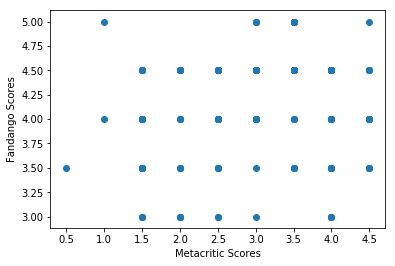

In [7]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.xlabel('Metacritic Scores')
plt.ylabel('Fandango Scores')
plt.plot()

In [8]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']
movies['fm_diff'] = np.absolute(movies['fm_diff'])
sorted_movies = movies.sort_values(by='fm_diff', ascending=False)
sorted_movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


## Calculating Correlation
To determine relationship between scores on FG and MC

In [9]:
r, pvalue = stats.pearsonr(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
print('Correlation coefficient: {0}'.format(r))

Correlation coefficient: 0.17844919073895918


The correlation between the ratings on FG and MC is fairly low indicating a significantly large difference between the ratings for the same movies on the different review sites.

## Predicting Scores

In [10]:
predict_y = lambda x, m, c: x * m + c
    
slope, intercept, rvalue, pvalue, stderr = stats.linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

def predict_fg_from_mc(mc_score):
    return predict_y(mc_score, slope, intercept)


# Predicting what the equivalent score of a movie rated 3.0 on MC would be FG
predict_fg_from_mc(3)

4.0917071528212041

## Finding Residuals

(1, 5)

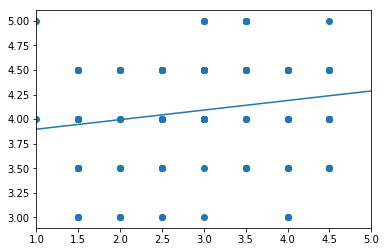

In [11]:
mc_ratings = [1.0, 5.0]
predicted_fg_ratings = [predict_fg_from_mc(r) for r in mc_ratings]

plt.plot(mc_ratings, predicted_fg_ratings)
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.xlim(1, 5)

The difference between the movie ratings above indicate that not only does Fandango inflate ratings for the movies their users review but also does so differently depending on the movie.